# This model calculates Beta of the stock based on 5-year daily basis. 

Libraries

In [1]:
# Import the libraries
import pandas_datareader.data as reader
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from scipy import stats

# Input: To Fill 

In [2]:
# Input the reference name from Yahoo Finance
a = "1155.KL"
b = "^KLSE%3FP%3D^KLSE"

Function

In [ ]:
# Input based on the above 
input = [a,b]

Time

In [3]:
end = dt.datetime.now ()
start = dt.date (end.year - 5, end.month, end.day)

Dataframe

In [4]:
# We are using the "Adj close" price of the securities selected 
df = reader.get_data_yahoo(input, start, end)["Adj Close"]

In [5]:
# Print the dataframe
df

Symbols,1155.KL,^KLSE%3FP%3D^KLSE
Date,,
2016-07-25,5.745457,1668.260010
2016-07-26,5.738362,1661.420044
2016-07-27,5.695804,1663.560059
2016-07-28,5.688711,1658.500000
2016-07-29,5.688711,1653.260010
...,...,...
2021-07-16,8.050000,1522.479980
2021-07-19,8.030000,1519.969971
2021-07-21,8.010000,1516.520020


Calculation

In [6]:
# Calculate the daily returns 
day_ret = df.resample("D").ffill().pct_change()

# Remove the first row - NaN error 
day_ret = day_ret.dropna(axis=0)

# Print
day_ret

Symbols,1155.KL,^KLSE%3FP%3D^KLSE
Date,,
2016-07-26,-0.001235,-0.004100
2016-07-27,-0.007417,0.001288
2016-07-28,-0.001245,-0.003042
2016-07-29,0.000000,-0.003159
2016-07-30,0.000000,0.000000
...,...,...
2021-07-19,-0.002485,-0.001649
2021-07-20,0.000000,0.000000
2021-07-21,-0.002491,-0.002270


Define Variable

In [7]:
# Index selected above 
ind_pct = day_ret[b]

# Stock selected above 
stck_pct = day_ret[a]

Calculation

In [8]:
# Define the independence variable
ind_pct_sm = sm.add_constant(ind_pct)

In [9]:
# Define model by using ordinary least square approach 
model = sm.OLS (stck_pct, ind_pct_sm)

In [10]:
results = model.fit()

In [11]:
# coefficient of the index is the Beta figure
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                1155.KL   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     1184.
Date:                Sun, 25 Jul 2021   Prob (F-statistic):          2.24e-200
Time:                        23:54:09   Log-Likelihood:                 6546.9
No. Observations:                1824   AIC:                        -1.309e+04
Df Residuals:                    1822   BIC:                        -1.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.000      1.591      0.112    -5.8e-05       0.001
^KLSE%3FP%3D^KLSE     0.8983      0.026     34.413      0.000       0.847       0.949
==============================================================================
Omnibus:                      471.223   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33968.150
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                      24.141   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Do the fit and print the slope (whuch is out beta value) to the screen.
slope, intercept, r, p, std_err  = stats.linregress(ind_pct,stck_pct)
print("Beta = ", slope)

Beta =  0.8982878816638981


Visualisation

In [13]:
# Create data needed to plot a the fit.  
# x starts and the min value of the Index data and goes to the max Index value
x = np.linspace(np.amin(ind_pct), np.amax(ind_pct))
y = slope * x + intercept

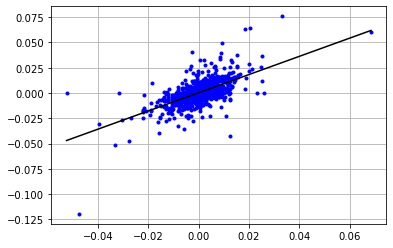

In [14]:
# Plot it!
plt.plot(ind_pct, stck_pct, "b.")
plt.plot(x, y, "k")
plt.grid(True)
plt.show()